In [26]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [27]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('Variavel_out.xlsx', sheet_name='LookerStudio')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeça  \
888    NaN  830.17               35.3                28.3                 9.3   
889    NaN  756.44               34.0                27.5                 9.7   
890    NaN  600.67               32.0                29.7                 8.5   
891    NaN  830.18               34.5                28.3                 9.5   
892    NaN  888.25               34.1                27.5                 9.1   
893    NaN  683.54               30.0                28.8                 8.0   
894    NaN  841.54               33.1                29.3                 9.1   
895    NaN  666.60               31.5                26.4                 8.9   
896    NaN  798.02               34.0                28.3                 9.3   
897    NaN  739.16               32.0                27.1                 9.0   

     altura  espessura  
888    10.3        3.4  
889    10.9        3.3  
890     9.4        3.4  
891    1

In [28]:
# Dropping the columns
df2 = df.drop(columns=[
'Index',
'espessura'
])
df2.head()

,peso,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura
0,51.45,14.3,12.2,4.0,4.1
1,37.15,12.4,10.9,3.8,3.2
2,47.26,13.7,11.2,3.4,4.0
3,36.67,12.9,11.1,3.7,3.7
4,45.48,13.2,11.3,3.8,4.5


In [29]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [30]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df2,  target = 'peso', remove_outliers = True, train_size=0.8)
#exp2= setup(data = df2,  target = 'peso', remove_outliers = True, remove_multicollinearity = True, multicollinearity_threshold = 0.7)
best_model = exp2.compare_models()

,Description,Value
0,Session id,5205
1,Target,peso
2,Target type,Regression
3,Original data shape,"(898, 5)"
4,Transformed data shape,"(862, 5)"
5,Transformed train set shape,"(682, 5)"
6,Transformed test set shape,"(180, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,17.9560,1184.0981,32.7846,0.9775,0.0832,0.0598,0.0880
rf,Random Forest Regressor,18.2486,1221.5049,33.4152,0.9767,0.0826,0.0599,0.0980
knn,K Neighbors Regressor,19.2369,1279.2437,34.2672,0.9758,0.0965,0.0639,0.0460
gbr,Gradient Boosting Regressor,18.4784,1324.6152,34.9822,0.9745,0.0835,0.0615,0.0650
lightgbm,Light Gradient Boosting Machine,19.5924,1446.6972,36.4237,0.9727,0.0838,0.0617,0.1030
xgboost,Extreme Gradient Boosting,20.7004,1535.8257,37.9395,0.9704,0.0935,0.0679,0.0550
ada,AdaBoost Regressor,28.0197,1887.0896,42.1088,0.9638,0.2079,0.1649,0.0820
dt,Decision Tree Regressor,23.7305,1934.6685,42.4356,0.9626,0.1099,0.0781,0.0440
llar,Lasso Least Angle Regression,44.7405,4010.6572,62.8350,0.9229,0.4577,0.3335,0.0420
lasso,Lasso Regression,44.7427,4008.4697,62.8163,0.9229,0.4572,0.3335,0.0570


In [31]:
rf = exp2.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16.4426,764.9789,27.6583,0.9826,0.0677,0.0532
1,23.0581,1868.4749,43.2259,0.9682,0.0809,0.0626
2,26.3058,4113.7715,64.1387,0.9270,0.1298,0.0778
3,18.3140,886.0564,29.7667,0.9803,0.0906,0.0657
4,16.5697,931.4186,30.5192,0.9828,0.0739,0.0578
5,19.0869,1182.1815,34.3829,0.9785,0.0679,0.0505
6,18.4940,1165.9300,34.1457,0.9732,0.0863,0.0702
7,18.9875,1116.7517,33.4178,0.9773,0.0692,0.0553
8,24.5302,1878.6087,43.3429,0.9686,0.0992,0.0735


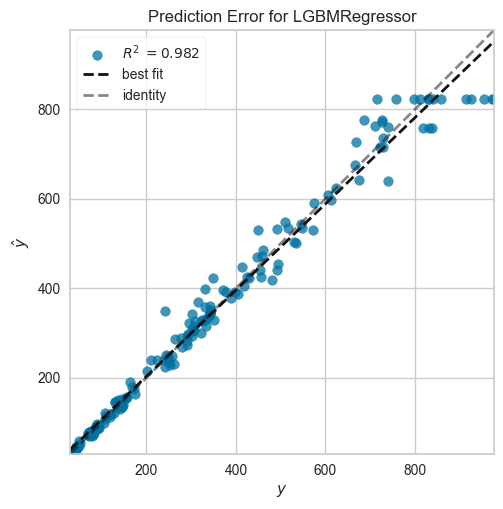

In [32]:
exp2.plot_model(rf, plot = 'error')

In [33]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [34]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,19.2735,1172.0366,34.2350,0.9822,0.0753,0.0579


,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
30,12.500000,10.700000,3.2,3.7,41.040001,36.817747
157,16.299999,14.200000,4.2,4.7,85.559998,87.866891
93,13.400000,11.300000,3.2,4.0,43.520000,45.415348
241,18.700001,16.000000,4.7,5.5,141.250000,130.694400
489,24.600000,20.799999,6.0,7.7,342.640015,343.628118
271,18.500000,16.700001,5.3,5.5,137.399994,149.746049
281,18.500000,16.200001,5.3,5.5,129.440002,145.603986
339,18.700001,15.700000,5.0,5.8,140.070007,136.662181
760,29.799999,26.200001,8.5,8.7,517.150024,534.449274
308,19.400000,16.500000,5.0,5.5,134.559998,146.700731


In [35]:
peso_pred_semEspe.head()

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
479,24.0,19.900000,6.1,7.5,321.859985,298.962910
72,12.0,10.200000,3.2,3.8,34.820000,34.656548
40,11.5,9.800000,3.2,3.5,30.270000,34.584108
232,15.2,13.400000,4.2,4.6,71.019997,70.894279
896,34.0,28.299999,9.3,11.1,798.020020,821.925285


# Continuidade do Modelo

In [36]:
### Saving model 

#save_model(rf, 'rf_weight') 


In [37]:
################### LOADING MODEL
saved_rf = load_model('rf_weight') 

saved_rf 

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\crist\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['comprimento_Total',
                                             'comprimento_Padrao',
                                             'comprimento_Cabeca', 'altura'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=8604))])

In [38]:
exp2.predict_model(saved_rf)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- comprimento_Cabeça
Feature names seen at fit time, yet now missing:
- comprimento_Cabeca


In [13]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)